<a href="https://colab.research.google.com/github/DDoeuiGongju/DoItDeeplearning/blob/main/08_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 합성곱 연산
- 합성곱: 두 함수에 적용해 새로운 함수를 만드는 수학 연산자

### 합성곱 구현하며 이해해보기

In [ ]:
import numpy as np
w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

# 배열 뒤집기(reverse)
print('reverse')
# 1. np.flip()
w_r = np.flip(w)
print(w_r)
# 2. 슬라이스 연산자
w_r = w[::-1]
print(w_r)

# 합성곱 수행
# 1. np.dot()
print('\n합성곱 수행')
for i in range(6):
    print(np.dot(x[i:i+4], w_r))
# 2. scipy의 convolve()
from scipy.signal import convolve
print(convolve(x, w, mode='valid'))


reverse
[3 5 1 2]
[3 5 1 2]

합성곱 수행
63
48
49
28
21
20
[63 48 49 28 21 20]


### 교차 상관 연산
- 합성곱 신경망은 대부분 합성곱이 아니라 교차 상관을 사용한다.
- 교차 상관: 합성곱과 동일하게 연산하지만 배열을 뒤집지 않는다.

In [ ]:
# 교차 상관 구현해보기
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

#### 왜 교차상관을 사용해??
- 모든 모델은 훈련 전 가중치 배열의 요소들을 무작위로 초기화한다. 합성곱 신경망에서 가중치 배열은 미끄러지는 배열이다. 따라서 이 배열을 뒤집든 안뒤집든 차이가 없다.

### 패딩과 스트라이드
- 패딩(padding): 원본 배열의 양 끝애 빈 원소를 추가하는 것
    1. 밸리드 패딩: 원본 배열에 패딩을 추가하지 않고 미끄러지는 배열이 원본 배열의끝으로 갈 때까지 교차 상관 수행
        - 출력 배열의 크기는 원본 배열보다 항상 작다.
        - 원본 배열의 원소마다 연산에 참여하는 횟수가 다르고, 배열 양 끝 원소의 참여도가 가장 낮다.
        - mode='valid'
    2. 풀 패딩(제로 패딩): 원본 배열 양 끝에 가상의 원소 0을 추가해 모든 원소가 연산에 동일하게 참여하도록 한다.
        - mode='full'
    3. 세임 패딩: 출력 배열과 원본 배열의 길이가 동일하도록 제로 패딩을 추가한다.
        - mode='same'  
        - 대부분 세임 패딩 사용

- 스트라이드(stride): 미끄러지는 배열의 간격을 조절하는 것
    - 보통은 스트라이드를 1로 지정한다.

### 이차원 배열에서의 합성곱
- 미끄러지는 배열이 오른쪽으로 이동 

In [ ]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0],
              [0, 0]])

# scipy의 correlate2d 사용
from scipy.signal import correlate2d

In [ ]:
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [ ]:
# same 사용 시 오른쪽과 아래 모서리에 제로 패딩 추가
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

### 텐서플로우에서 합성곱
- 원본 배열 = 입력
- 미끄러지는 배열 = 가중치 or 필터 or 커널  
  

- conv2d: 텐서플로우에서 합성곱을 수행하는 함수
    - 입력으로 4차원 배열을 기대  
      ex) 배치, 높이, 너비, 컬러 채널 차원
    - 가중치도 4개의 차원으로 구성  
      ex) 높이, 너비, 채널, 가중치 개수     
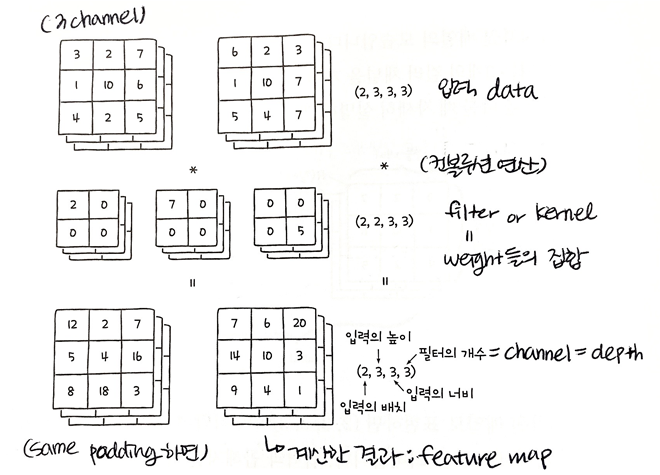

### 2차원 배열을 4차원으로 바꿔 합성곱 수행
- reshape(): 배열의 차원 변환
- astype(): 자료형 변환

In [22]:
import tensorflow as tf
# 배치: 1, 높이: 3, 너비:3, 채널:1
x_4d = x.astype(np.float).reshape(1, 3, 3, 1)
# 높이: 2, 너비: 2, 채널: 1, 가중치 개수: 1
w_4d = w.reshape(2, 2, 1, 1)

# conv2d는 결과값으로 tensor반환
c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')
# numpy()를 이용해 텐서를 넘파이 배열로 변환하고,
# reshape()을 이용해 편의상 배치 차원과 컬러 차원 제거
c_out.numpy().reshape(3, 3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])